In [1]:
import os
import cv2
import time
import uuid
import matplotlib.pyplot as plt

In [3]:
os.chdir('C:\\Users\\ivanp\\Desktop\\data')
dir_inicio = os.getcwd()

In [7]:
IMAGES_PATH = os.path.join(dir_inicio , 'images')
number_images = 40

In [9]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.png')
    cv2.imwrite(imgname, frame)
    img = cv2.imread(imgname)
    img_resized = cv2.resize(img, (112, 112))
    cv2.imwrite(imgname, img_resized)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
path = 'C:\\Users\\ivanp\\Desktop\\AMIGOS112'
for filename in os.listdir(path):
    image_path = os.path.join(path,filename)
    try:
        img = cv2.imread(image_path)
        img = cv2.resize(img, (112,112))
        new_filename = os.path.splitext(filename)[0] + '.png'
        new_image_path = os.path.join(path, new_filename)
        cv2.imwrite(new_image_path, img)
        os.remove(image_path)
    except Exception as e:
        print("error")

In [10]:
!labelme

In [2]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [15]:
images = tf.data.Dataset.list_files('C:\\Users\\ivanp\\Desktop\\data\\images\\*.png')

In [16]:
images.as_numpy_iterator().next()

b'C:\\Users\\ivanp\\Desktop\\data\\images\\1eebfbb8-effc-11ed-a5bf-fcaa14ca5db0.png'

In [5]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [18]:
images = images.map(load_image)

In [19]:
images.as_numpy_iterator().next()

array([[[ 83, 138, 195],
        [ 84, 139, 196],
        [ 85, 140, 197],
        ...,
        [185, 219, 254],
        [186, 221, 253],
        [186, 221, 253]],

       [[ 84, 139, 196],
        [ 85, 140, 197],
        [ 86, 141, 198],
        ...,
        [186, 220, 255],
        [186, 221, 253],
        [185, 221, 253]],

       [[ 85, 140, 197],
        [ 86, 141, 198],
        [ 89, 141, 199],
        ...,
        [185, 221, 255],
        [185, 221, 255],
        [183, 222, 255]],

       ...,

       [[ 41,  74, 107],
        [ 41,  75, 110],
        [ 45,  79, 116],
        ...,
        [ 15,  21,  33],
        [ 14,  20,  32],
        [ 17,  23,  35]],

       [[ 36,  70, 105],
        [ 43,  77, 112],
        [ 44,  78, 115],
        ...,
        [ 15,  23,  34],
        [ 10,  16,  28],
        [ 16,  23,  33]],

       [[ 46,  80, 115],
        [ 43,  77, 112],
        [ 31,  67, 103],
        ...,
        [ 14,  22,  33],
        [ 16,  23,  33],
        [ 12,  19,  29]]

In [20]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [21]:
image_generator = images.batch(4).as_numpy_iterator()

In [30]:
plot_images = image_generator.next()

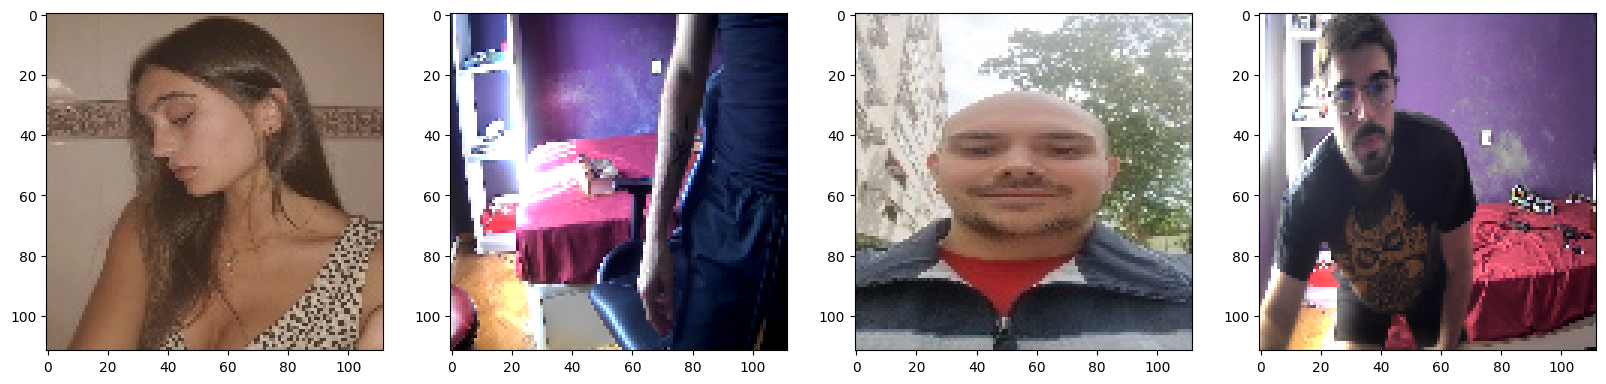

In [31]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [32]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('C:\\Users\\ivanp\\Desktop\\data', folder, 'images')):
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('C:\\Users\\ivanp\\Desktop\\data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('C:\\Users\\ivanp\\Desktop\\data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)

In [6]:
import albumentations as alb

In [7]:
augmentor = alb.Compose([alb.RandomCrop(width=100, height=100), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [36]:
img = cv2.imread(os.path.join('C:\\Users\\ivanp\\Desktop\\data','train', 'images','0a50912a-e7b9-436d-8fb1-10d9a16668a9.png'))

In [37]:
with open(os.path.join('C:\\Users\\ivanp\\Desktop\\data', 'train', 'labels', '0a50912a-e7b9-436d-8fb1-10d9a16668a9.json'), 'r') as f:
    label = json.load(f)

In [38]:
label

{'version': '5.2.0.post4',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[24.784530386740343, 5.944751381215477],
    [56.05524861878454, 29.149171270718234]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '..\\images\\0a50912a-e7b9-436d-8fb1-10d9a16668a9.png',
 'imageData': 'iVBORw0KGgoAAAANSUhEUgAAAHAAAABwCAIAAABJgmMcAABPoUlEQVR4nI39abAt2XEehuaw1qqqvffZZ7jnTj2hGzPYABogCJIgQICizUG0Bkhi2EFZlETTsl5YTwyFbdnvhV+EgoIlT3qy/ETRtCnIT09SaAqGRFogJREkTTAIAiQBgiKbGBtA4/Zw53POnqrWkJnvx6q9z7m3G7Yrzj1x7t61a1flypWZ68svc+Fnf/Xn2rZ1zpkZAABA/QOZELH+1wzrWwpk6oCUIQJEUERFsgCEZiIkRARkZdDWBzArIuCCEqoxEakaEYEaARAAmJGpIgCAEQJAMSU1ZlZDRDTCGGPrg6rWmxlvA8HMDAARebw3q+cgopmJCPPu5g3w/ONoBAC2vZSZyXjW7rXtp4B2L5JtBbA7UAEADVT1ouicc67eRH0DEYkIEbUKEhEAdnfDhko0vmIMgEAEZoikCN43uRQrMJnOckoE6JwXNEYyUwQyU1VAAyRSESIqCgDovR8ki0jXdZJivX7O2bdNHendA9fbYwBBALP61Yho9oDEd/dcHw0uvIOAD6nOK4/tpc6vgLtPXzjJLohodzWHrzguXrp+4MKLyKoAgOgM0NAAwAgN1bHPpTAHBReTAQSlwghoBiqkwMTo

In [39]:
label['shapes'][0]['points']

[[24.784530386740343, 5.944751381215477],
 [56.05524861878454, 29.149171270718234]]

In [40]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [41]:
coords

[24.784530386740343, 5.944751381215477, 56.05524861878454, 29.149171270718234]

In [42]:
coords = list(np.divide(coords, [112,112,112,112]))

640 480

In [43]:
coords

[0.2212904498816102,
 0.05307813733228105,
 0.5004932912391477,
 0.2602604577742699]

In [8]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

NameError: name 'img' is not defined

In [45]:
augmented['bboxes'][0][2:]

(0.8621546961325965, 1.0)

In [46]:
augmented['bboxes']

[(0.5494475138121546, 0.7885082872928177, 0.8621546961325965, 1.0)]

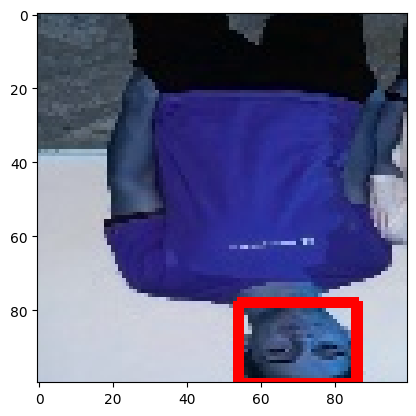

In [47]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [100,100]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [100,100]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [48]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('C:\\Users\\ivanp\\Desktop\\data', partition, 'images')):
        img = cv2.imread(os.path.join('C:\\Users\\ivanp\\Desktop\\data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('C:\\Users\\ivanp\\Desktop\\data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [112,112,112,112]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('C:\\Users\\ivanp\\Desktop\\aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('C:\\Users\\ivanp\\Desktop\\aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

In [10]:
train_images = tf.data.Dataset.list_files('C:\\Users\\ivanp\\Desktop\\aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (112,112)))
train_images = train_images.map(lambda x: x/255)

In [11]:
test_images = tf.data.Dataset.list_files('C:\\Users\\ivanp\\Desktop\\aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (112,112)))
test_images = test_images.map(lambda x: x/255)

In [12]:
val_images = tf.data.Dataset.list_files('C:\\Users\\ivanp\\Desktop\\aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (112,112)))
val_images = val_images.map(lambda x: x/255)

In [13]:
train_images.as_numpy_iterator().next()

array([[[0.21568628, 0.1764706 , 0.4117647 ],
        [0.21568628, 0.1764706 , 0.4117647 ],
        [0.22142857, 0.18508404, 0.4117647 ],
        ...,
        [0.46330518, 0.49936965, 0.65735257],
        [0.48816526, 0.514986  , 0.72268903],
        [0.49803922, 0.52156866, 0.7490196 ]],

       [[0.21239495, 0.17317927, 0.40847337],
        [0.21791966, 0.17870398, 0.41399813],
        [0.22712961, 0.19078507, 0.41746572],
        ...,
        [0.43856135, 0.47550744, 0.63084555],
        [0.4958058 , 0.5253889 , 0.7248049 ],
        [0.5112045 , 0.5347339 , 0.7621849 ]],

       [[0.21176471, 0.16967787, 0.404972  ],
        [0.22557649, 0.18348965, 0.41878375],
        [0.23473266, 0.19341488, 0.4221976 ],
        ...,
        [0.3881409 , 0.42525578, 0.5779854 ],
        [0.4929109 , 0.5234844 , 0.7199291 ],
        [0.5165967 , 0.5429972 , 0.76183474]],

       ...,

       [[0.3264001 , 0.3146354 , 0.34782872],
        [0.13332824, 0.12638299, 0.15475686],
        [0.10399641, 0

In [6]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [15]:
train_labels = tf.data.Dataset.list_files('C:\\Users\\ivanp\\Desktop\\aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [16]:
test_labels = tf.data.Dataset.list_files('C:\\Users\\ivanp\\Desktop\\aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [17]:
val_labels = tf.data.Dataset.list_files('C:\\Users\\ivanp\\Desktop\\aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [18]:
train_labels.as_numpy_iterator().next()

(array([0], dtype=uint8), array([0., 0., 0., 0.], dtype=float16))

In [19]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(19740, 19740, 1080, 1080, 1080, 1080)

In [20]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(21000)
train = train.batch(8)
train = train.prefetch(4)

In [21]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1200)
test = test.batch(8)
test = test.prefetch(4)

In [22]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1200)
val = val.batch(8)
val = val.prefetch(4)

In [23]:
train.as_numpy_iterator().next()[1]

(array([[0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1]], dtype=uint8),
 array([[0.    , 0.    , 0.    , 0.    ],
        [0.3992, 0.5317, 0.5894, 0.859 ],
        [0.4456, 0.38  , 0.85  , 0.855 ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.439 , 0.3928, 0.628 , 0.7896],
        [0.    , 0.    , 0.    , 0.    ],
        [0.1315, 0.553 , 0.3225, 0.864 ],
        [0.4797, 0.635 , 0.64  , 0.953 ]], dtype=float16))

In [24]:
data_samples = train.as_numpy_iterator()

In [25]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


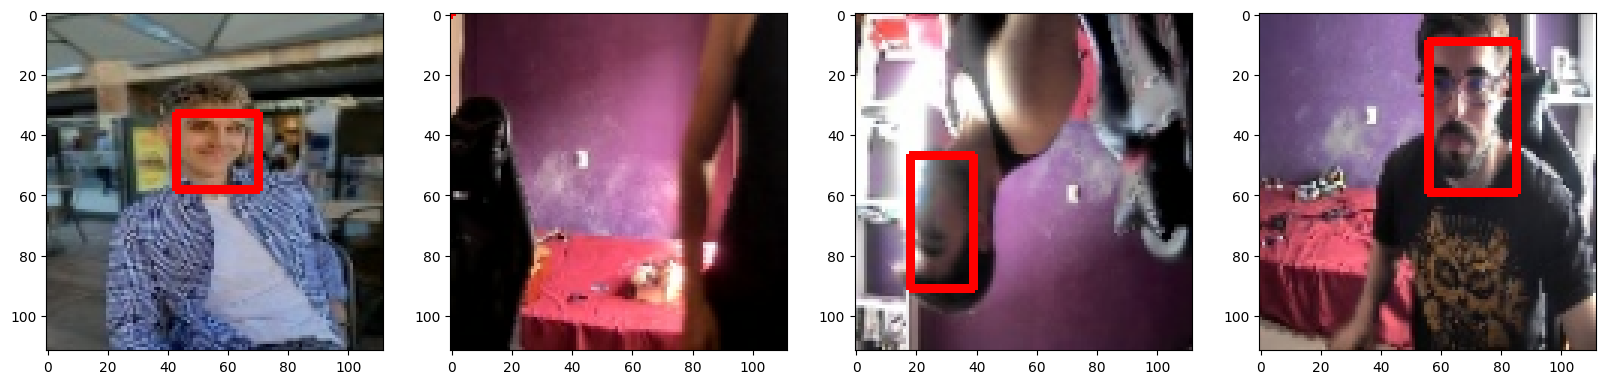

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [27]:
vgg = VGG16(include_top=False)

In [28]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [29]:
def build_model(): 
    input_layer = Input(shape=(112,112,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [30]:
facetracker = build_model()
facetracker.summary()
X, y = train.as_numpy_iterator().next()
X.shape
classes, coords = facetracker.predict(X)
classes, coords

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 112, 112, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

(array([[0.5554765 ],
        [0.46838188],
        [0.51517653],
        [0.5248332 ],
        [0.50255376],
        [0.58679175],
        [0.61086106],
        [0.5193355 ]], dtype=float32),
 array([[0.5271436 , 0.28808522, 0.705153  , 0.43947005],
        [0.58071566, 0.32725143, 0.64185184, 0.48495907],
        [0.5677252 , 0.26958424, 0.7017889 , 0.53403723],
        [0.47611877, 0.36347622, 0.78040785, 0.5291999 ],
        [0.45928916, 0.32860693, 0.74353075, 0.46125895],
        [0.523675  , 0.48314255, 0.68265986, 0.45506138],
        [0.5366326 , 0.29054615, 0.7047533 , 0.40536484],
        [0.42165038, 0.3396142 , 0.7361437 , 0.45377725]], dtype=float32))

In [31]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [32]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

In [8]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [34]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [35]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=1.7241898>

In [36]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.6121133>

In [37]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=1.7241898>

In [38]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [39]:
model = FaceTracker(facetracker)

In [40]:
model.compile(opt, classloss, regressloss)

In [41]:
logdir='logs'

In [42]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [228]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
2468/2468 [==============================] - 3994s 2s/step - total_loss: 0.1730 - class_loss: 0.0454 - regress_loss: 0.1503 - val_total_loss: 0.0223 - val_class_loss: 6.7532e-05 - val_regress_loss: 0.0222
Epoch 2/10
2468/2468 [==============================] - 3845s 2s/step - total_loss: 0.0377 - class_loss: 0.0084 - regress_loss: 0.0335 - val_total_loss: 0.0137 - val_class_loss: 3.5936e-05 - val_regress_loss: 0.0137
Epoch 3/10
2468/2468 [==============================] - 3424s 1s/step - total_loss: 0.0201 - class_loss: 0.0038 - regress_loss: 0.0182 - val_total_loss: 1.2504 - val_class_loss: 1.3538 - val_regress_loss: 0.5735
Epoch 4/10
2468/2468 [==============================] - 3529s 1s/step - total_loss: 0.0079 - class_loss: 8.4051e-04 - regress_loss: 0.0075 - val_total_loss: 0.0052 - val_class_loss: 7.0930e-06 - val_regress_loss: 0.0052
Epoch 5/10
2468/2468 [==============================] - 3625s 1s/step - total_loss: 0.0047 - class_loss: 1.4371e-05 - regress_loss: 0.00

In [229]:
hist.history

{'total_loss': [0.018257183954119682,
  0.0012509701773524284,
  0.0037294854409992695,
  0.0036129262298345566,
  0.000719304895028472,
  0.0014081218978390098,
  0.0004315177211537957,
  0.000842548324726522,
  0.0012750707101076841,
  0.0007364945486187935],
 'class_loss': [4.205275035928935e-05,
  8.881725079845637e-05,
  1.2800306649296544e-05,
  8.598090971645433e-06,
  1.7106816812884063e-05,
  1.1608246495597996e-05,
  6.407502723959624e-07,
  1.0579841500657494e-06,
  2.0861631355728605e-07,
  1.2367993349471362e-06],
 'regress_loss': [0.018236158415675163,
  0.001206561573781073,
  0.003723085392266512,
  0.0036086272448301315,
  0.0007107515120878816,
  0.0014023177791386843,
  0.000431197346188128,
  0.0008420193335041404,
  0.0012749664019793272,
  0.0007358761504292488],
 'val_total_loss': [0.022281944751739502,
  0.013741868548095226,
  1.2504303455352783,
  0.005160881206393242,
  0.012208454310894012,
  0.006370164453983307,
  0.006663917563855648,
  0.0038035844918340

NameError: name 'hist' is not defined

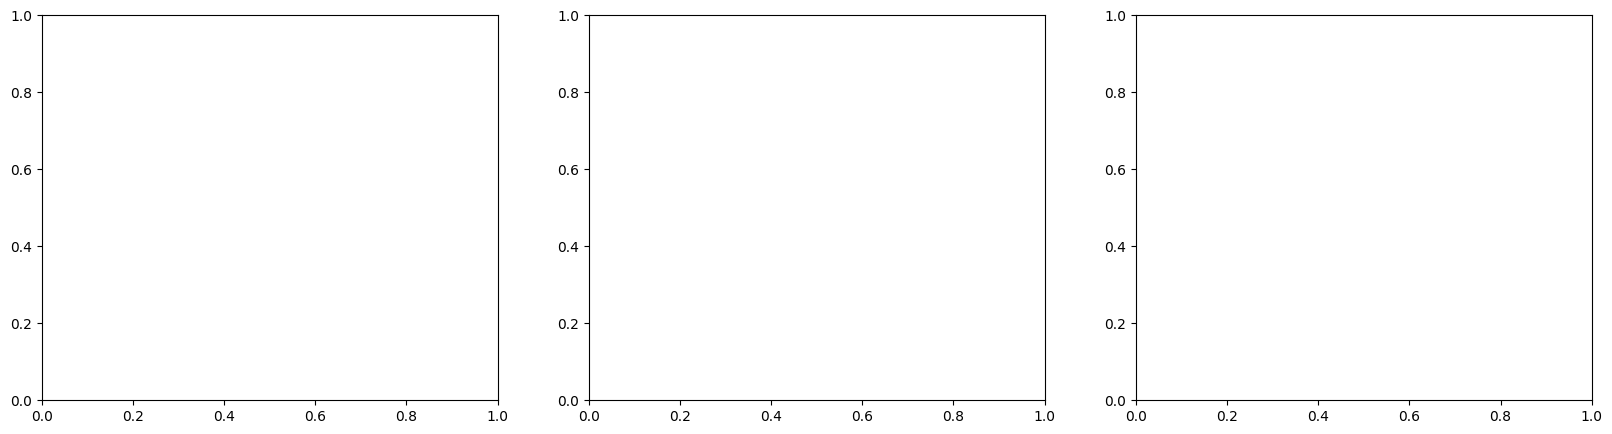

In [51]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [103]:
test_data = test.as_numpy_iterator()

In [104]:
test_sample = test_data.next()

In [105]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 397ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


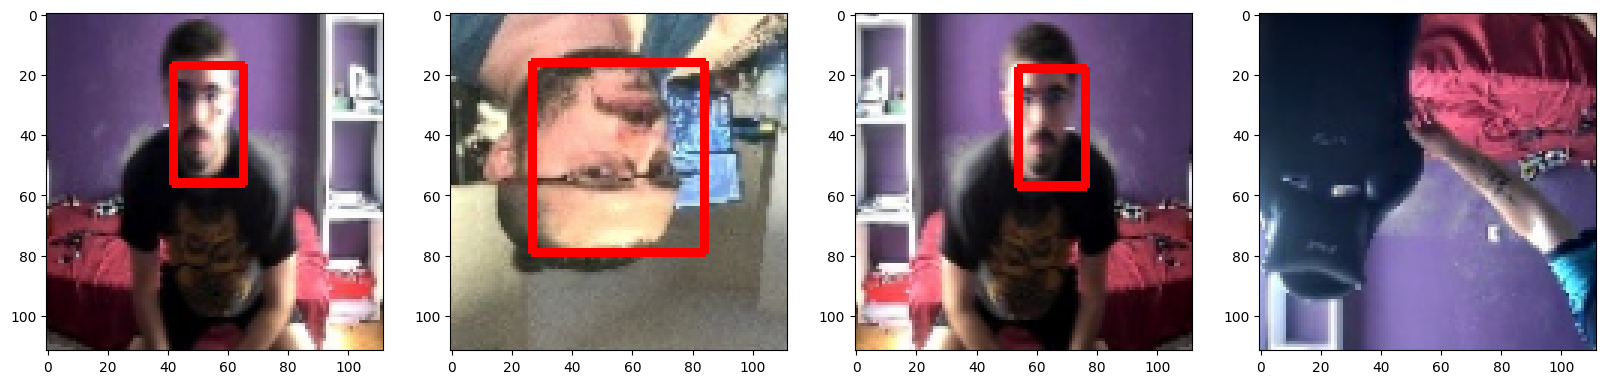

In [106]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [9]:
from tensorflow.keras.models import load_model

In [ ]:
facetracker.save('facetracker6.h5')

In [10]:
facetracker = load_model('C:\\Users\\ivanp\\Desktop\\data\\facetracker5.h5')

In [11]:
cap = cv2.VideoCapture(0)
accuracy_values = []
while cap.isOpened():   
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (112,112))

    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]

    if yhat[0] > 0.9: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)

        # Controls the text rendered
        cv2.putText(frame, str('face'), tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

    cv2.imshow('EyeTrack', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 63ms/step


In [13]:
os.chdir("C:\\Users\\ivanp\\Desktop\\resultados")
dir_inicio = os.getcwd()
IMAGES_PATH = os.path.join(dir_inicio , 'images')
values =[]
cap = cv2.VideoCapture(0)
while cap.isOpened():
        ret, frame = cap.read()
        imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.png')
        cv2.imwrite(imgname, frame)
        img = cv2.imread(imgname)
        img_resized = cv2.resize(img, (112, 112))
        cv2.imwrite(imgname, img_resized)
        time.sleep(0.03)
        
    ###_ , frame = cap.read()
        frame = frame[50:500, 50:500,:]

        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        resized = tf.image.resize(rgb, (112,112))

        yhat = facetracker.predict(np.expand_dims(resized/255,0))
        sample_coords = yhat[1][0]

        if yhat[0] > 0.7:
            values.append(1)
            # Controls the main rectangle
            cv2.rectangle(frame, 
                          tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                          tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                                (255,0,0), 2)
            # Controls the label rectangle
            cv2.rectangle(frame, 
                          tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                        [0,-30])),
                          tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                        [80,0])), 
                                (255,0,0), -1)

            # Controls the text rendered
            cv2.putText(frame, str('face'), tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                                   [0,-5])),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
        else:
            values.append(0)
            
        cv2.imshow('EyeTrack', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        if len(values) > 199:
            break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 77ms/step


In [14]:
print(len(values))
print(values)

200
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [16]:
from sklearn.metrics import accuracy_score

In [20]:
!labelme

In [37]:
for image in os.listdir(os.path.join('C:\\Users\\ivanp\\Desktop\\resultados\\images')):
    img = cv2.imread(os.path.join('C:\\Users\\ivanp\\Desktop\\resultados\\images', image))

    coords = [0, 0, 0.00001, 0.00001]
    label_path = os.path.join('C:\\Users\\ivanp\\Desktop\\resultados\\labels', f'{image.split(".")[0]}.json')
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            label = json.load(f)

        coords[0] = label['shapes'][0]['points'][0][0]
        coords[1] = label['shapes'][0]['points'][0][1]
        coords[2] = label['shapes'][0]['points'][1][0]
        coords[3] = label['shapes'][0]['points'][1][1]
        coords = list(np.divide(coords, [112, 112, 112, 112]))

    try:
        annotation = {}
        annotation['image'] = image

        if os.path.exists(label_path):
            annotation['bbox'] = coords
            annotation['class'] = 1
        else:
            annotation['bbox'] = [0, 0, 0, 0]
            annotation['class'] = 0

        with open(os.path.join('C:\\Users\\ivanp\\Desktop\\resultados\\final_labels', f'{image.split(".")[0]}.json'), 'w') as f:
            json.dump(annotation, f)

    except Exception as e:
        print(e)

In [17]:
import json
import os
from natsort import natsorted

In [47]:
def process_images(path):
    values = []
    true_path = []

    for file in os.listdir(path):
        if file.endswith('.png'):
            image_path = os.path.join(path, file)
            true_path.append(image_path)

    true_path_ordered = natsorted(true_path)

    for image_path in true_path_ordered:
        image = cv2.imread(image_path)
        rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        resized = tf.image.resize(rgb, (112, 112))
        y = facetracker.predict(np.expand_dims(resized / 255, 0))
        if float(y[0]) > 0.7:
            values.append(1)
        else:
            values.append(0)
    
    return values

In [19]:
def process_labels(labels_path):
    label_values = []
    labels_true_path = []

    for file in os.listdir(labels_path):
        if file.endswith('.json'):
            file_path = os.path.join(labels_path, file)
            labels_true_path.append(file_path)

    label_true_path_ordered = natsorted(labels_true_path)

    for file_path in label_true_path_ordered:
        with open(file_path, 'r') as f:
            file_content = f.read()
            label = json.loads(file_content)
        class_value = label['class']
        label_values.append(class_value)
    
    return label_values

In [48]:
labels_path = "C:\\Users\\ivanp\\Desktop\\resultados\\final_labels"
label_results = process_labels(labels_path)

In [49]:
path = "C:\\Users\\ivanp\\Desktop\\resultados\\images"
results = process_images(path)

1/1 [==============================] - 0s 69ms/step


In [50]:
print(results)

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0]


In [40]:
print(label_results)

[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0]


In [52]:
accuracy = accuracy_score(results, label_results)
print(accuracy)

0.995


In [54]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = confusion_matrix(label_results, results)

classification_report = classification_report(label_results, results)

print("Matriz de confusión:")
print(confusion_matrix)
print("\nInforme de clasificación:")
print(classification_report)

Matriz de confusión:
[[ 76   0]
 [  1 123]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      0.99      1.00       124

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



In [55]:
from sklearn import metrics

auc = metrics.roc_auc_score(label_results, results)

print("AUC:", auc)

AUC: 0.9959677419354839
